In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
%matplotlib inline

In [34]:
customers = pd.read_csv("/content/all_stream_info.csv")

In [35]:
customers.head()

,liveStreamID,beginTime,endTime,duration,closeBy,maxLiveViewerCount,maxLiveViewerTime,privateLiveStream,receivedLikeCount,streamerType,isShow,cultureGroup,userID,registerTime,registerCountry,isContracted,uniqueViewerCount,ios,android,durationGTE5sec,durationGTE2min,durationGTE10min,totalViewerDuration,avgViewerDuration,avgStreamJoinDuration,count,followIncreaseEstimated,receivePointEstimated,dau
0,109437538,2020-06-22 11:55:21 UTC,2020-06-22 16:37:19 UTC,16918,normalEnd,363,2020-06-22 16:28:17.87 UTC,0,11092,0,False,NaN,63a8b9eb-c4a6-4ff6-8aaa-5f4c6f6fd4d7,2020-05-20 01:11:07 UTC,United States,NaN,779,46,30,68,17,13,32248.0,424.32,228.71,1108,5,13105,NaN
1,109441785,2020-06-22 14:55:26 UTC,2020-06-22 21:31:19 UTC,23753,normalEnd,100,2020-06-22 19:07:52.872 UTC,0,772,0,False,NaN,6cd90016-b679-4a7b-8cc6-2c43d4590cca,2015-07-27 07:19:53 UTC,United States,NaN,821,54,38,68,20,8,17138.0,186.28,134.94,2318,-3,90701,NaN
2,109438205,2020-06-22 12:20:34 UTC,2020-06-22 16:02:46 UTC,13332,disconnect,471,2020-06-22 14:53:26.692 UTC,0,19403,0,False,NaN,e4f04b19-ad3e-4c9d-7f29-6a2f6c93c842,2018-08-10 07:02:03 UTC,United States,NaN,1605,529,223,696,60,17,60852.0,81.14,34.46,1199,7,222376,NaN
3,109438917,2020-06-22 12:54:21 UTC,2020-06-22 14:47:27 UTC,6786,normalEnd,44,2020-06-22 14:29:13.806 UTC,0,191,0,False,NaN,b4dc876b-06fe-48b2-a40b-fa7f5007697a,2019-04-13 05:42:37 UTC,United States,NaN,96,23,24,41,12,8,18326.0,389.91,213.09,432,0,4313,NaN
4,109442185,2020-06-22 15:18:20 UTC,2020-06-22 15:48:02 UTC,1782,normalEnd,52,2020-06-22 15:42:33.849 UTC,0,77,0,False,NaN,8258d28e-47b9-4ce8-a765-29175b663a1d,2020-03-24 05:23:22 UTC,United States,NaN,109,20,18,38,17,5,8465.0,222.76,138.77,162,0,1547,NaN


In [36]:
customers.describe()

,liveStreamID,duration,maxLiveViewerCount,privateLiveStream,receivedLikeCount,streamerType,cultureGroup,isContracted,uniqueViewerCount,ios,android,durationGTE5sec,durationGTE2min,durationGTE10min,totalViewerDuration,avgViewerDuration,avgStreamJoinDuration,count,followIncreaseEstimated,receivePointEstimated,dau
count,3.148000e+03,3148.000000,3148.000000,3148.0,3148.000000,3148.0,0.0,0.0,3148.000000,3148.000000,3148.000000,3148.000000,3148.000000,3148.000000,1689.000000,1689.000000,1689.000000,3148.000000,3148.000000,3.148000e+03,0.0
mean,1.093797e+08,3495.864041,15.416773,0.0,358.428526,0.0,NaN,NaN,55.416773,26.285896,20.519377,44.560991,8.994917,3.937103,22296.820604,241.049467,128.459816,126.772872,1.171855,8.874376e+03,NaN
std,3.381310e+04,6651.916426,45.505183,0.0,2145.579197,0.0,NaN,NaN,160.855894,81.280647,60.532012,131.896474,26.843270,13.057200,58915.178623,244.360800,129.403209,330.297666,11.754047,4.778547e+04,NaN
min,1.093211e+08,0.000000,0.000000,0.0,0.000000,0.0,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-286.000000,0.000000e+00,NaN
25%,1.093518e+08,136.750000,0.000000,0.0,0.000000,0.0,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,996.000000,83.060000,52.940000,0.000000,0.000000,0.000000e+00,NaN
50%,1.093835e+08,1032.500000,2.000000,0.0,0.000000,0.0,NaN,NaN,2.000000,1.000000,0.000000,1.000000,0.000000,0.000000,5947.000000,185.300000,106.230000,1.000000,0.000000,0.000000e+00,NaN
75%,1.094082e+08,4801.500000,8.000000,0.0,62.000000,0.0,NaN,NaN,39.000000,20.000000,11.000000,31.000000,8.000000,3.000000,19413.000000,318.980000,167.350000,112.250000,1.000000,1.501500e+03,NaN
max,1.094427e+08,121258.000000,493.000000,0.0,65831.000000,0.0,NaN,NaN,2385.000000,1639.000000,730.000000,2142.000000,493.000000,302.000000,939946.000000,2855.000000,1906.000000,5342.000000,122.000000,1.474727e+06,NaN


In [37]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3148 entries, 0 to 3147
Data columns (total 29 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   liveStreamID             3148 non-null   int64  
 1   beginTime                3148 non-null   object 
 2   endTime                  3148 non-null   object 
 3   duration                 3148 non-null   int64  
 4   closeBy                  3051 non-null   object 
 5   maxLiveViewerCount       3148 non-null   int64  
 6   maxLiveViewerTime        1838 non-null   object 
 7   privateLiveStream        3148 non-null   int64  
 8   receivedLikeCount        3148 non-null   int64  
 9   streamerType             3148 non-null   int64  
 10  isShow                   3148 non-null   bool   
 11  cultureGroup             0 non-null      float64
 12  userID                   3148 non-null   object 
 13  registerTime             3148 non-null   object 
 14  registerCountry         

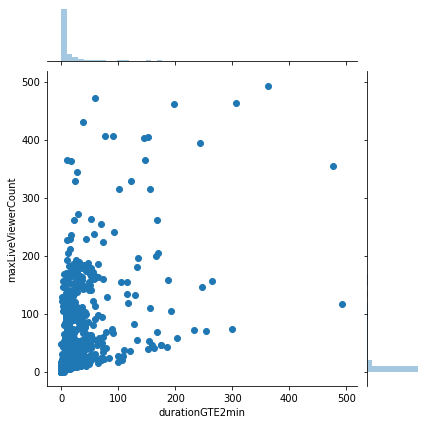

In [10]:
sns.jointplot(x="durationGTE2min",y="maxLiveViewerCount",data=customers,kind='scatter')

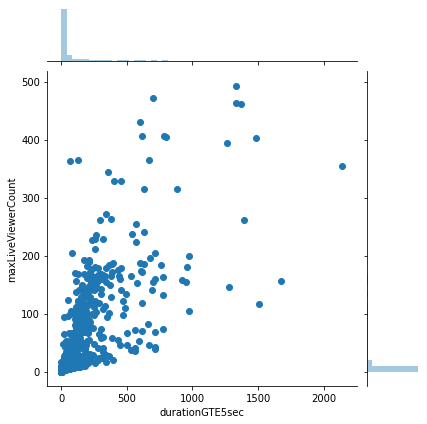

In [11]:
sns.jointplot(x="durationGTE5sec",y="maxLiveViewerCount",data=customers,kind='scatter')

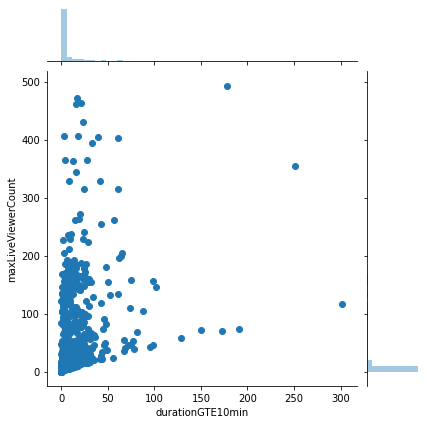

In [12]:
sns.jointplot(x="durationGTE10min",y="maxLiveViewerCount",data=customers,kind='scatter')

<string>:6: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


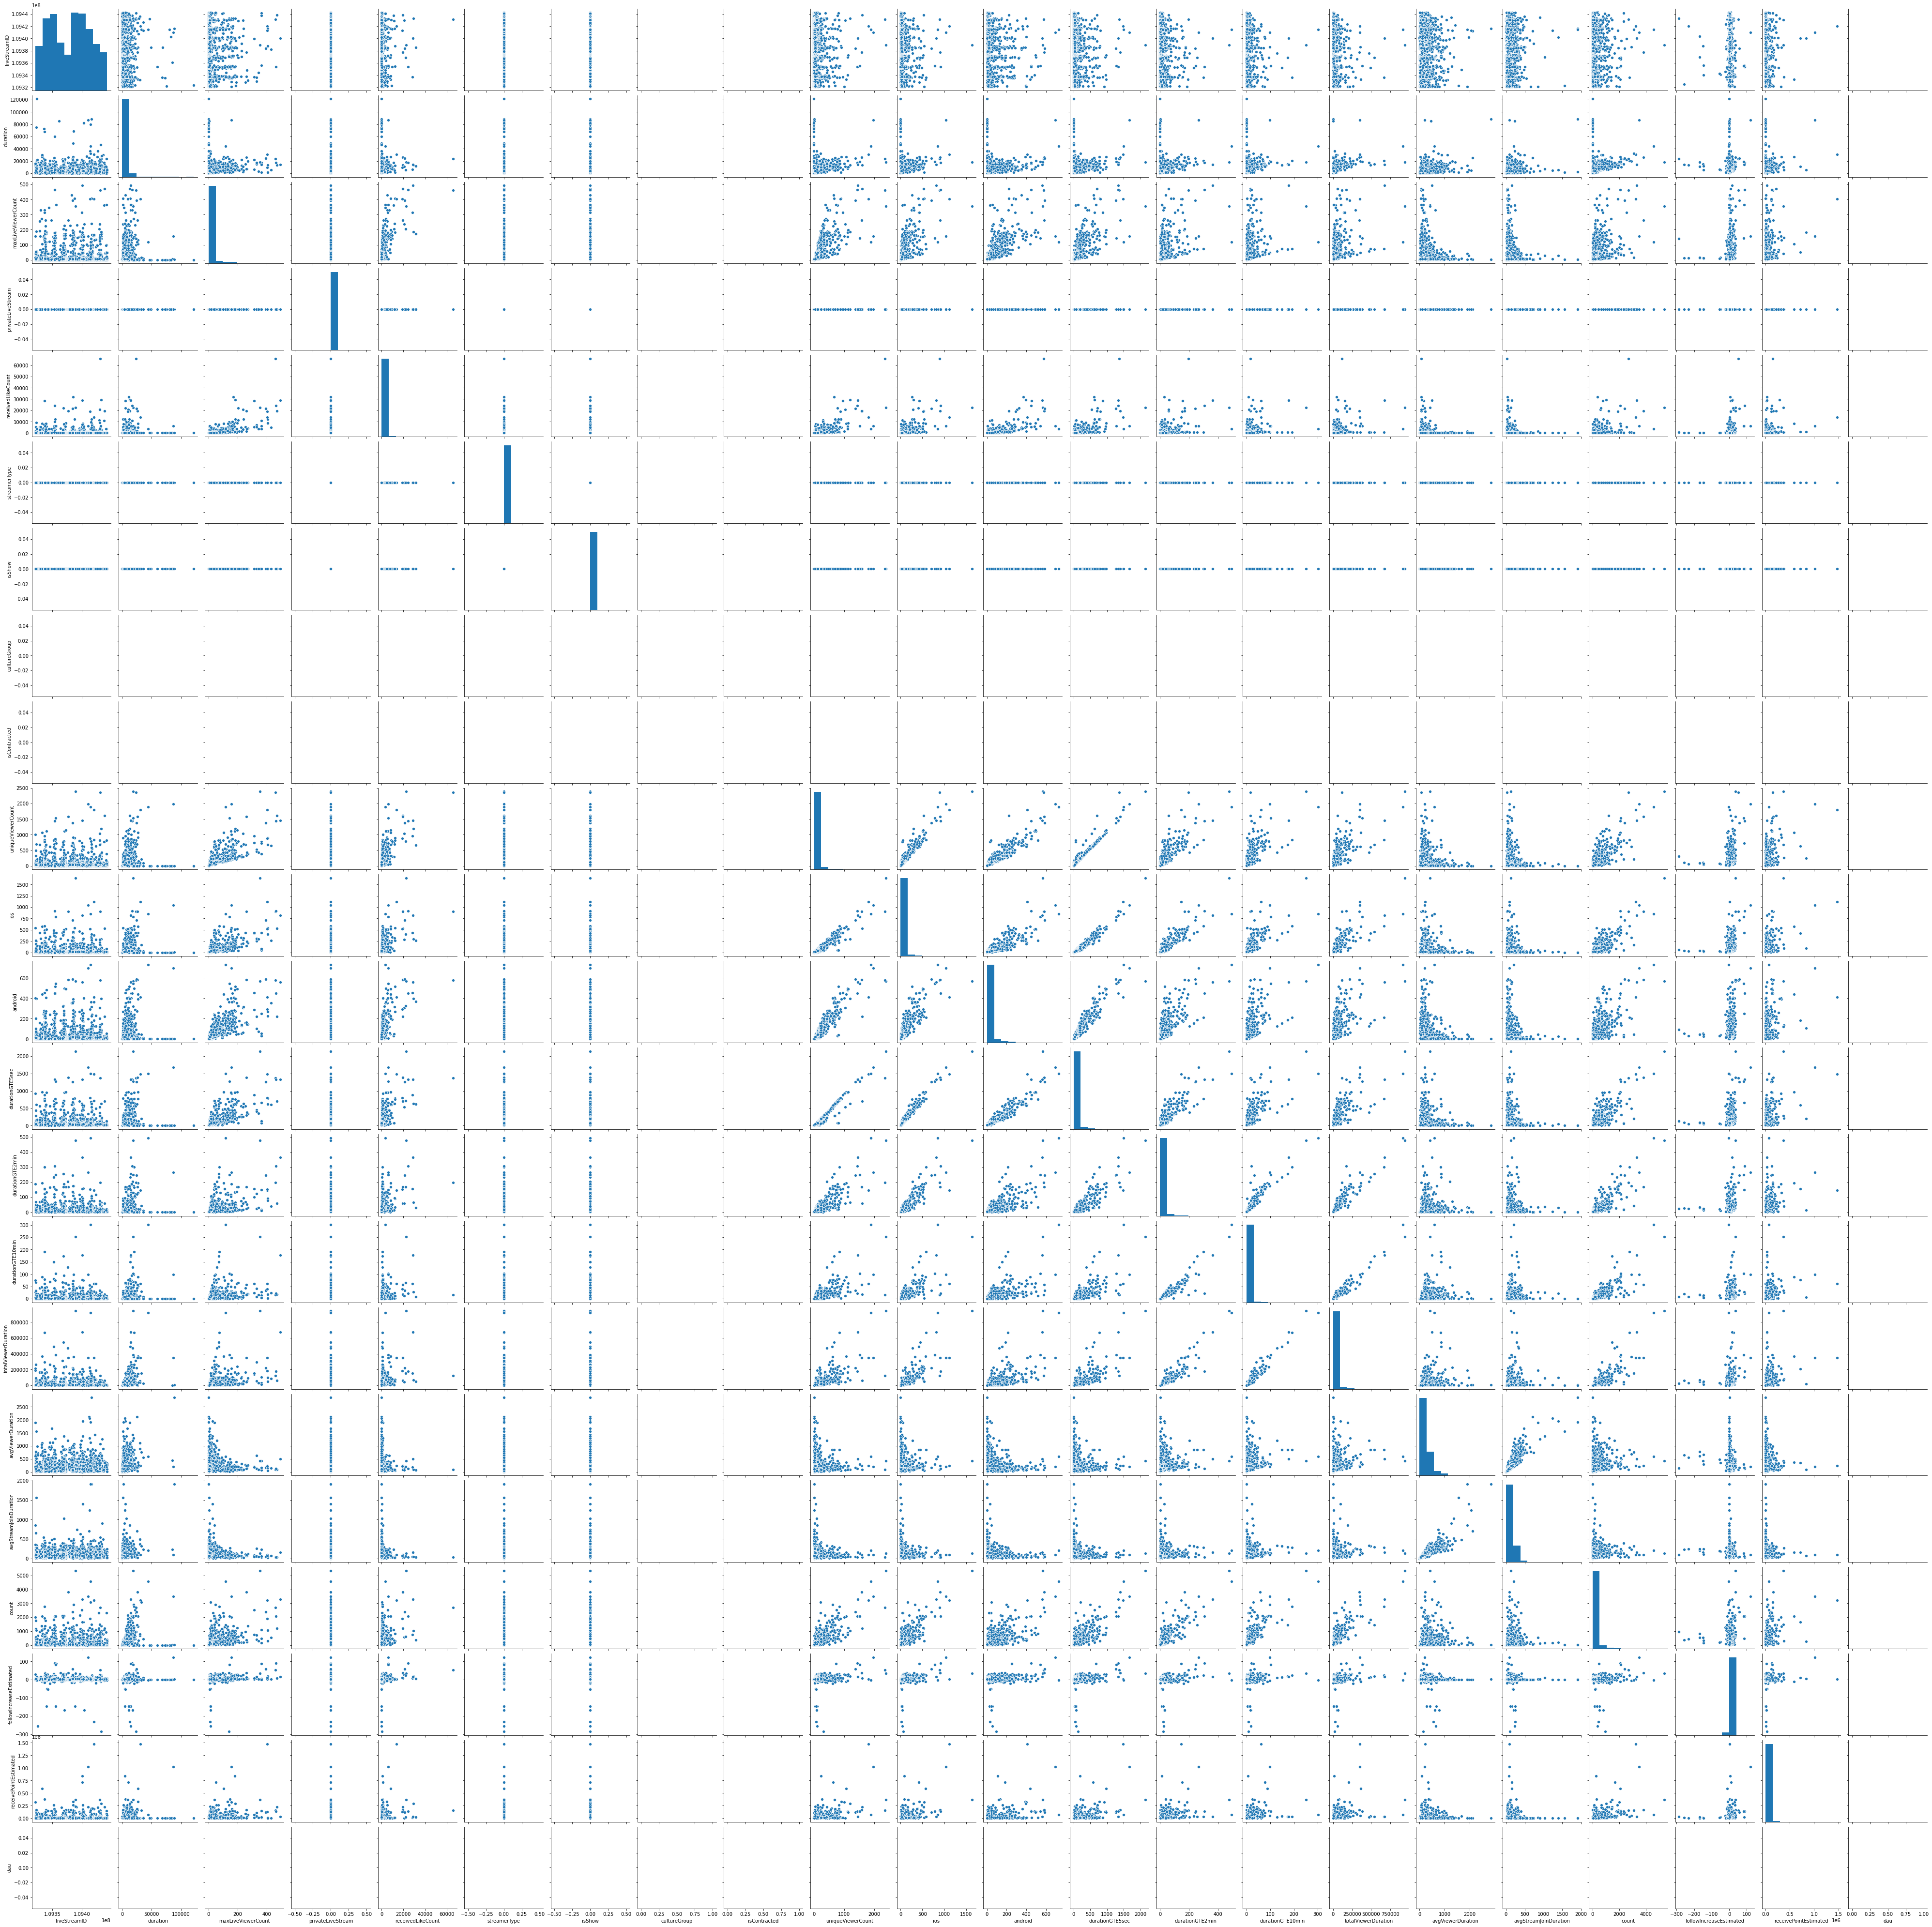

In [13]:
sns.pairplot(customers)

In [14]:
customers.columns

Index(['liveStreamID', 'beginTime', 'endTime', 'duration', 'closeBy',
       'maxLiveViewerCount', 'maxLiveViewerTime', 'privateLiveStream',
       'receivedLikeCount', 'streamerType', 'isShow', 'cultureGroup', 'userID',
       'registerTime', 'registerCountry', 'isContracted', 'uniqueViewerCount',
       'ios', 'android', 'durationGTE5sec', 'durationGTE2min',
       'durationGTE10min', 'totalViewerDuration', 'avgViewerDuration',
       'avgStreamJoinDuration', 'count', 'followIncreaseEstimated',
       'receivePointEstimated', 'dau'],
      dtype='object')

In [38]:
new_df =customers[(customers['durationGTE5sec']>31) & (customers['durationGTE2min']>8) & (customers['durationGTE10min']>3)]

In [39]:
new_df.describe()

,liveStreamID,duration,maxLiveViewerCount,privateLiveStream,receivedLikeCount,streamerType,cultureGroup,isContracted,uniqueViewerCount,ios,android,durationGTE5sec,durationGTE2min,durationGTE10min,totalViewerDuration,avgViewerDuration,avgStreamJoinDuration,count,followIncreaseEstimated,receivePointEstimated,dau
count,6.140000e+02,614.000000,614.000000,614.0,614.000000,614.0,0.0,0.0,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,6.140000e+02,0.0
mean,1.093753e+08,9321.724756,61.553746,0.0,1587.614007,0.0,NaN,NaN,235.633550,113.037459,88.623779,192.342020,39.369707,17.789902,55349.055375,326.103664,156.456889,539.425081,3.703583,3.938521e+04,NaN
std,3.229553e+04,6389.317531,82.024364,0.0,4546.592163,0.0,NaN,NaN,296.167495,153.516083,109.837238,243.265435,49.998908,25.095443,88355.895632,236.836210,104.800659,575.912154,26.228139,1.004737e+05,NaN
min,1.093212e+08,1070.000000,4.000000,0.0,20.000000,0.0,NaN,NaN,34.000000,15.000000,4.000000,32.000000,9.000000,4.000000,5879.000000,33.890000,11.210000,20.000000,-286.000000,1.100000e+01,NaN
25%,1.093491e+08,5618.750000,12.000000,0.0,120.250000,0.0,NaN,NaN,71.250000,37.000000,22.000000,58.000000,16.000000,7.000000,17040.250000,177.407500,95.520000,212.250000,1.000000,3.900000e+03,NaN
50%,1.093717e+08,7962.000000,20.000000,0.0,319.500000,0.0,NaN,NaN,132.500000,62.500000,45.000000,106.500000,24.000000,11.000000,29680.500000,256.965000,138.435000,367.000000,4.000000,1.165800e+04,NaN
75%,1.094007e+08,11675.250000,83.750000,0.0,909.000000,0.0,NaN,NaN,263.500000,117.750000,115.750000,211.500000,40.000000,19.000000,55520.750000,406.345000,193.697500,622.750000,9.000000,3.673875e+04,NaN
max,1.094422e+08,86491.000000,493.000000,0.0,65831.000000,0.0,NaN,NaN,2385.000000,1639.000000,730.000000,2142.000000,493.000000,302.000000,939946.000000,1955.260000,1396.610000,5342.000000,122.000000,1.474727e+06,NaN


In [40]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 614 entries, 0 to 3147
Data columns (total 29 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   liveStreamID             614 non-null    int64  
 1   beginTime                614 non-null    object 
 2   endTime                  614 non-null    object 
 3   duration                 614 non-null    int64  
 4   closeBy                  614 non-null    object 
 5   maxLiveViewerCount       614 non-null    int64  
 6   maxLiveViewerTime        614 non-null    object 
 7   privateLiveStream        614 non-null    int64  
 8   receivedLikeCount        614 non-null    int64  
 9   streamerType             614 non-null    int64  
 10  isShow                   614 non-null    bool   
 11  cultureGroup             0 non-null      float64
 12  userID                   614 non-null    object 
 13  registerTime             614 non-null    object 
 14  registerCountry          

In [41]:
new_df['class'] = 'Not Good' # add a class column with 0 as default value

# find all rows that fulfills your conditions and set class to 1
new_df.loc[(new_df['totalViewerDuration'] > 29680.5) & # if discount is more than .2 of total 
       (new_df['receivedLikeCount'] > 319) & # if tax is 0
       (new_df['avgViewerDuration'] > 256.9), # if total is > 100 
       'class'] = 'Good' # then set class to 1

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [42]:
new_df.head()

,liveStreamID,beginTime,endTime,duration,closeBy,maxLiveViewerCount,maxLiveViewerTime,privateLiveStream,receivedLikeCount,streamerType,isShow,cultureGroup,userID,registerTime,registerCountry,isContracted,uniqueViewerCount,ios,android,durationGTE5sec,durationGTE2min,durationGTE10min,totalViewerDuration,avgViewerDuration,avgStreamJoinDuration,count,followIncreaseEstimated,receivePointEstimated,dau,class
0,109437538,2020-06-22 11:55:21 UTC,2020-06-22 16:37:19 UTC,16918,normalEnd,363,2020-06-22 16:28:17.87 UTC,0,11092,0,False,NaN,63a8b9eb-c4a6-4ff6-8aaa-5f4c6f6fd4d7,2020-05-20 01:11:07 UTC,United States,NaN,779,46,30,68,17,13,32248.0,424.32,228.71,1108,5,13105,NaN,Good
1,109441785,2020-06-22 14:55:26 UTC,2020-06-22 21:31:19 UTC,23753,normalEnd,100,2020-06-22 19:07:52.872 UTC,0,772,0,False,NaN,6cd90016-b679-4a7b-8cc6-2c43d4590cca,2015-07-27 07:19:53 UTC,United States,NaN,821,54,38,68,20,8,17138.0,186.28,134.94,2318,-3,90701,NaN,Not Good
2,109438205,2020-06-22 12:20:34 UTC,2020-06-22 16:02:46 UTC,13332,disconnect,471,2020-06-22 14:53:26.692 UTC,0,19403,0,False,NaN,e4f04b19-ad3e-4c9d-7f29-6a2f6c93c842,2018-08-10 07:02:03 UTC,United States,NaN,1605,529,223,696,60,17,60852.0,81.14,34.46,1199,7,222376,NaN,Not Good
3,109438917,2020-06-22 12:54:21 UTC,2020-06-22 14:47:27 UTC,6786,normalEnd,44,2020-06-22 14:29:13.806 UTC,0,191,0,False,NaN,b4dc876b-06fe-48b2-a40b-fa7f5007697a,2019-04-13 05:42:37 UTC,United States,NaN,96,23,24,41,12,8,18326.0,389.91,213.09,432,0,4313,NaN,Not Good
4,109442185,2020-06-22 15:18:20 UTC,2020-06-22 15:48:02 UTC,1782,normalEnd,52,2020-06-22 15:42:33.849 UTC,0,77,0,False,NaN,8258d28e-47b9-4ce8-a765-29175b663a1d,2020-03-24 05:23:22 UTC,United States,NaN,109,20,18,38,17,5,8465.0,222.76,138.77,162,0,1547,NaN,Not Good


In [48]:
X = new_df[['maxLiveViewerCount', 'receivedLikeCount', 'totalViewerDuration', 'avgViewerDuration', 'followIncreaseEstimated', 'count']]
y = new_df['class']

In [49]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

In [50]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [51]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [52]:
y_pred = classifier.predict(X_test)

In [58]:
from sklearn.metrics import accuracy_score
accuracy= accuracy_score(y_test,y_pred) 
accuracy

0.943089430894309

In [53]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[ 14   6]
 [  1 102]]
              precision    recall  f1-score   support

        Good       0.93      0.70      0.80        20
    Not Good       0.94      0.99      0.97       103

    accuracy                           0.94       123
   macro avg       0.94      0.85      0.88       123
weighted avg       0.94      0.94      0.94       123



In [54]:
error = []

# Calculating error for K values between 1 and 40
for i in range(1, 40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Mean Error')

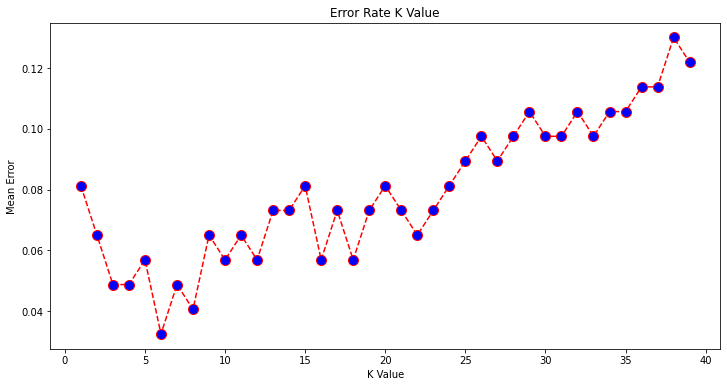

In [55]:
plt.figure(figsize=(12, 6))
plt.plot(range(1, 40), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')